# Materia: Inteligencia Artificial II  
# Actividad: Assignment 3 – Principal Component Analysis  
# Alumno: Jeronimo Guillermo Lopez Jakubaschk - 634826
# Fecha: 13 de febrero de 2026


## Introducción

El PCA es una forma de simplificar datos que tienen muchas columnas, sin perder lo más importante de la información. Básicamente ayuda a quedarnos solo con lo que más influye en los datos y a quitar lo que se repite o no aporta tanto, tal cual lo vimos en clase.

Esta técnica se usa mucho antes de entrenar modelos, sobre todo cuando los datos tienen muchas variables que están relacionadas entre sí.
## Selección del conjunto de datos

Para esta actividad se eligió el Wine Dataset, Ya que segun lo investigado, es un dataset muy común para hacer clasificacion.

El dataset contiene información de muestras de vino que pertenecen a tres tipos diferentes.  
Cada muestra tiene 13 características numéricas relacionadas con su composición química, y una variable que indica a qué tipo de vino pertenece.

Considero que esta base de datos es una buena opción para hacerle PCA porque tiene muchas variables numéricas, las cuales están relacionadas entre sí y además manejan diferentes escalas.   

### Fuente del conjunto de datos

La base de datos fue obtenido de la biblioteca `scikit-learn`:

Enlace del dataset:  
https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset





En esta celda se carga la base de datos Wine utilizando la biblioteca scikit-learn.  
Los datos se separan en variables predictoras y variable objetivo, y posteriormente se organizan en un DataFrame para facilitar su análisis.


In [2]:
from sklearn.datasets import load_wine # De aqui conseguimos el dataset
import pandas as pd

wine = load_wine() # Cargamos el dataset
X = pd.DataFrame(wine.data, columns=wine.feature_names) # Creamos DataFrame con las variables que predeciremos
y = pd.Series(wine.target, name="tipo_de_vino") # Creamos variable objetivo
df = pd.concat([X, y], axis=1) # Unir todo en un solo DataFrame

df.head() # Enseñamos el contenido del dataset (solamente los 1°ros datos por eso puse head)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,tipo_de_vino
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Análisis de los datos

Antes de aplicar PCA, hay que ver la estructura de la base de datos, a ver si no hay que realizar limpieza.  
En esta sección se analiza el tipo de datos, el numero variables y se obtienemos estadísticas para entender la información.


In [3]:
df.info() # Información de cada variable del dataset, (protip del profesor Mauro Delboy) simplemente para ver las variables de forma más ordenada


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  tipo_

Podemos ver en la base de datos que contiene únicamente variables numéricas y no se ven valores faltantes. Lo cual es una buena señal ya que no necesitaremos hacer limpieza



## Análisis de correlación

En esta sección se analiza la relación entre las variables numéricas del conjunto de datos.  
El objetivo es identificar qué características están relacionadas entre sí para ver que datos podemos eliminar sin necesidad de perder precisión.


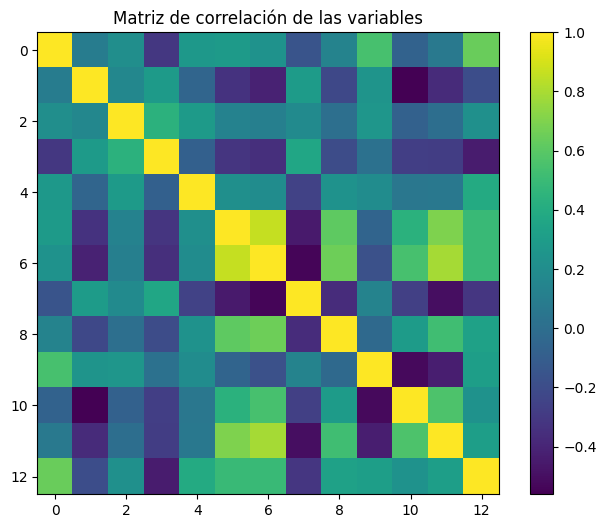

In [4]:
import matplotlib.pyplot as plt


corr_matrix = X.corr() # Calculamos la matriz de correlación

# Ploteamos
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix)
plt.colorbar()
plt.title("Matriz de correlación de las variables")
plt.show()

 Se pueden observar relaciones entre algunas características, lo que indica que hay información repetida y esto quiere decir que PCA nos puede ayudar a reducir el número de variables.



## Estandarización de los datos

Antes de aplicar PCA, es necesario estandarizar las variables de la base de datos.

La estandarización  nos permite que todas las variables tengan la misma importancia durante el análisis.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Creamos el escalador

X_scaled = scaler.fit_transform(X) # Estandarizamos solamente variables que predictoras
X_scaled


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Después de estandarizar los datos, todas las variables quedan en la misma escala osea estan centradas en 0 como lo vimos en clase.

## Matriz de covarianza

En esta sección se calcula la matriz de covarianza a partir de los datos estandarizados. Con esto, nos permitira analizar cómo varían las variables entre sí y qué tan relacionadas están.


In [6]:
import numpy as np

# Calculamos la matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

cov_matrix


array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

 A lo que visto en clase los valores positivos indican que dos variables aumentan juntas y los valores negativos indican que cuando una aumenta la otra disminuye.



## eigenvalues y eigenvectors

Calculamos los eigenvalues y eigenvectors de la matriz de covarianza.  
Los eigenvectors indican las direcciones principales en las que los datos varían y los eigenvalues indican cuánta variación existe en cada una de esas direcciones.


In [7]:
# Calculamos eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors


(array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
        0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
        0.29051203, 0.22706428, 0.25232001]),
 array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.05279942],
        [-0.14199204,  0.29963

## Ordenar eigenvalues y eigenvectors

Para hacer el PCA, es necesario ordenar los eigenvalues de mayor a menor, ya que estos indican cuánta información contiene cada componente principal.

In [8]:
# Aqui no sabia muy bien como ordenarlos asi que me ayude de la IA para hacer esta parte...

idx = np.argsort(eigenvalues) # En esta parte se obtienen los indices quienes ordenarian los eigenvalues de menor a mayor

idx = idx[::-1] # se invierte el orden del indice con el -1 y los :: indican que va de inicio a fin por eso se quedan vacios

eigenvalues_sorted = eigenvalues[idx] # Reordenamos los eigenvalores usando los índices ordenados y el 1er eigenvalue es el que tiene mas variación

eigenvectors_sorted = eigenvectors[:, idx] # Reodernamos con el nuevo orden el index indica que ordena la columnas para que puedan coincidir con los eigenvalues

## Explicación de la varianza explicada

En esta parte veremos el porcentaje de varianza explicada por cada componente principal.
Esto permite analizar cuánta información conserva cada componente para saber cuántos componentes son suficientes.

In [9]:
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)

explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Aqui vemos que indica qué porcentaje de la información total aporta cada componente.

## Explicación de la varianza acumulada

La varianza explicada acumulada muestra cuánta información se conserva al ir sumando los componentes principales.

In [10]:
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

La varianza explicada acumulada indica el porcentaje total de información retenida cuando consideramos varios componentes.

## Gráfica de la varianza explicada

En esta sección se realiza una gráfica de la varianza explicada acumulada para observar cuánta información se conserva al aumentar el número de componentes.

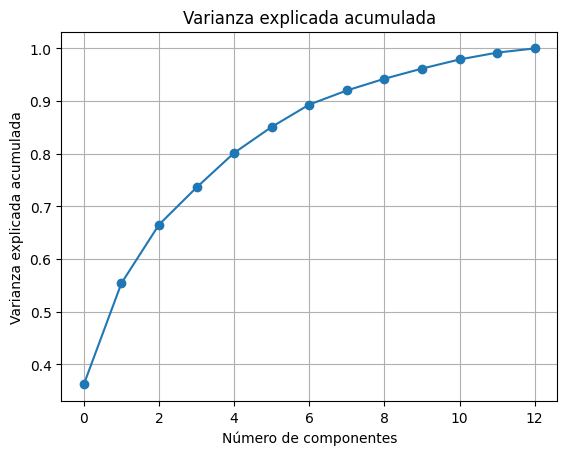

In [11]:
# Creamos la gráfica de varianza explicada acumulada
plt.figure()
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada acumulada")
plt.grid()
plt.show()

Podemos ver como la varianza explicada aumenta conforme se agregan más componentes.

Normalmente se elige el punto donde la curva comienza a estabilizarse, ya que a partir de ahí el agregar más componentes no aporta mucha información adicional.

## Proyección de los datos en 2D

En esta sección se proyectan los datos originales en un espacio de dos dimensiones en los que utilizamos los dos primeros componentes para visualizar los datos de manera mas sencilla y conservamos una buena parte de la información original.

In [12]:
W_2 = eigenvectors_sorted[:, :2] # Seleccionamos los dos primeros eigenvectores
X_pca_2D = X_scaled.dot(W_2) # Enseñamos los datos en 2D

X_pca_2D


array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

Después de la visualización, cada parte de la base de datos queda representada por solo dos valores quienes pertenecan a los dos primeros componentes.

## Visualización del PCA en dos dimensiones

En esta sección se muestra una gráfica en dos dimensiones utilizando los dos primeros componentes. El cual nos permitira observar como se distribuyen los datos en un pequeño espacio.


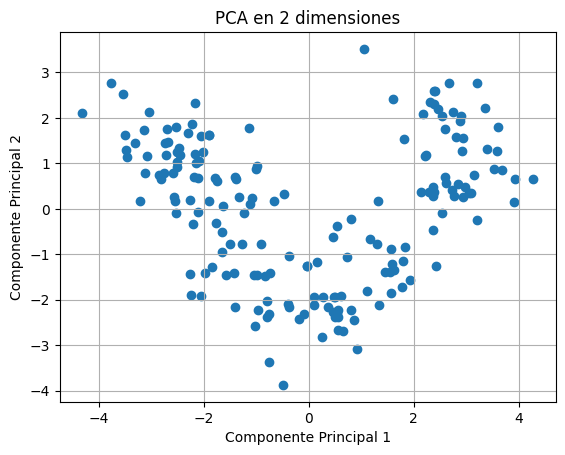

In [13]:
plt.figure()
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1])
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA en 2 dimensiones")
plt.grid()
plt.show()

En la gráfica se observa cómo los datos originales se visualizan en un espacio de dos dimensiones.Pdemos ver que usamos menos variables, en cambio, los datos siguen manteniendo la forma general que tenían antes. Esto quiere decir que aunque se simplificaron no se perdió la información más importante.


## Conclusiones

En esta actividad aprendi a aplicar el PCA y cómo se puede usar para trabajar con muchos datos de una forma más sencilla.  
Al inicio, el conjunto de datos tenía muchas variables y era complicado analizarlas todas al mismo tiempo. Cuando usamos el PCA, se pudo reducir la cantidad de variables sin perder la información más importante, el cual nos ayudo a ver los datos de manera más clara y a entender mejor cómo están relacionados.


## Referencias

- UCI Machine Learning Repository. (s.f.). *Wine Data Set*. Recuperado de https://archive.ics.uci.edu/ml/datasets/wine

- Jolliffe, I. T. (2002). *Principal component analysis* (2nd ed.). New York, NY: Springer.

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830.

- Han, J., Kamber, M., & Pei, J. (2012). *Data mining: Concepts and techniques* (3rd ed.). Waltham, MA: Morgan Kaufmann.

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning*. New York, NY: Springer.
